[1.91100677 0.50339086]


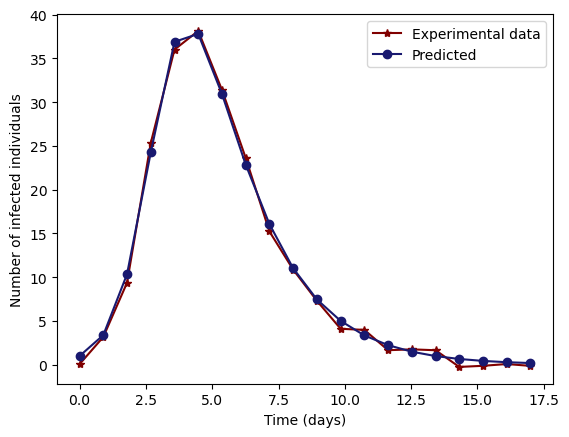

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import curve_fit

def sir_soln(t,beta,alpha):
    time_span = (0, 17)  # Time range
    y0 = [99, 1, 0]  # Initial conditions
    solution = solve_ivp(sir, time_span, y0, args=(beta, alpha), t_eval=np.linspace(0, 17, 20))
    return solution.y[1]



def sir(t, y, beta, alpha):
    S, I, R = y
    dSdt = -beta * S * I / 100
    dIdt = beta * S * I / 100 - alpha * I
    dRdt = alpha * I
    return [dSdt, dIdt, dRdt]

    

tdata = np.linspace(0, 17, 20)
alpha=0.5
beta=1.9
ydata = sir_soln(tdata,beta,alpha)
rng = np.random.default_rng()
y_noise = 1 * rng.normal(size=tdata.size)
#ydata = y.y[1]
ydata=ydata+y_noise
#plt.plot(solution.t, solution.y[1], '-o', label='I(t)')
popt, pcov = curve_fit(sir_soln, tdata, ydata)

alpha=popt[1]
beta=popt[0]
ypred = sir_soln(tdata,beta,alpha)
alpha_est, beta_est = popt
print(popt)

# Now plot the predicted solution using the esimated parameters against the data

plt.plot(tdata, ydata, '-*', label='Experimental data', color='maroon')
plt.plot(tdata, ypred, '-o', label='Predicted', color='midnightblue')
# plt.title('Comparison of experimental and fitted data')
plt.xlabel('Time (days)')
plt.ylabel('Number of infected individuals')
plt.legend()
plt.show()


Estimated beta: 1.8139, 95% CI: [1.6889, 1.9390]
Estimated alpha: 0.4652, 95% CI: [0.4264, 0.5040]


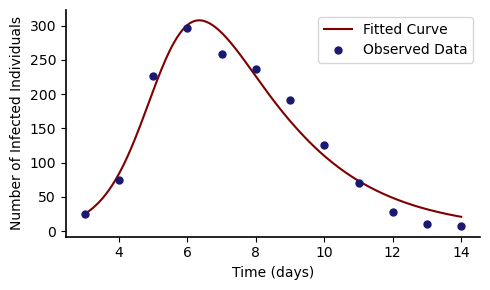

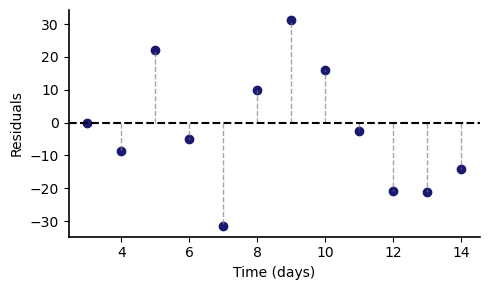

In [4]:
import matplotlib.pyplot as plt
from scipy.stats import t
import pandas as pd

# Define the SIR model
def sir(t, y, beta, alpha):
    S, I, R = y
    dSdt = -beta * S * I / 763
    dIdt = beta * S * I / 763 - alpha * I
    dRdt = alpha * I
    return [dSdt, dIdt, dRdt]

# Solve the SIR model for given parameters
def sir_soln(t, beta, alpha):
    time_span = (3, 14)
    y0 = [763 - 25, 25, 0]
    solution = solve_ivp(sir, time_span, y0, args=(beta, alpha), t_eval=t)
    return solution.y[1]

# Load influenza data
influenza_df = pd.read_csv("/home/mercyn/Desktop/ MY PROJECT/influenza_data.csv")
tdata = influenza_df["t"].values
ydata = influenza_df["no_infected"].values

# Fit the model using curve_fit
popt, pcov = curve_fit(sir_soln, tdata, ydata)
beta_est, alpha_est = popt

# Compute 95% confidence intervals
alpha = 0.05
dof = len(ydata) - len(popt)
t_value = t.ppf(1 - alpha / 2, dof)
param_errors = np.sqrt(np.diag(pcov))
ci_lower = popt - t_value * param_errors
ci_upper = popt + t_value * param_errors

# Display estimated parameters and intervals
print(f"Estimated beta: {beta_est:.4f}, 95% CI: [{ci_lower[0]:.4f}, {ci_upper[0]:.4f}]")
print(f"Estimated alpha: {alpha_est:.4f}, 95% CI: [{ci_lower[1]:.4f}, {ci_upper[1]:.4f}]")

# Evaluate model at original and smooth time points
ypred = sir_soln(tdata, beta_est, alpha_est)
t_smooth = np.linspace(tdata.min(), tdata.max(), 300)
ypred_smooth = sir_soln(t_smooth, beta_est, alpha_est)

# Compute residuals
residuals = ydata - ypred

# Plot: Fitted Curve (Smooth) + Observed Data
plt.figure(figsize=(5, 3))
plt.plot(t_smooth, ypred_smooth, '-', label='Fitted Curve', color='maroon')
plt.plot(tdata, ydata, 'o', label='Observed Data', color='midnightblue', markersize=5)
plt.xlabel('Time (days)')
plt.ylabel('Number of Infected Individuals')
# plt.title('SIR Model Fit to Influenza Data')
plt.legend()

# Clean up axes (remove top and right spines)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)

plt.tight_layout()
plt.show()

# Plot: Residuals
plt.figure(figsize=(5, 3))
plt.scatter(tdata, residuals, color='midnightblue', label='Residuals')
for x, y in zip(tdata, residuals):
    plt.plot([x, x], [0, y], color='gray', linestyle='dashed', linewidth=1, alpha=0.7)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Time (days)')
plt.ylabel('Residuals')
# plt.title('Residual Plot')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)

plt.tight_layout()
plt.show()


Percentage acceptance rate = 0.54% when eps = 15


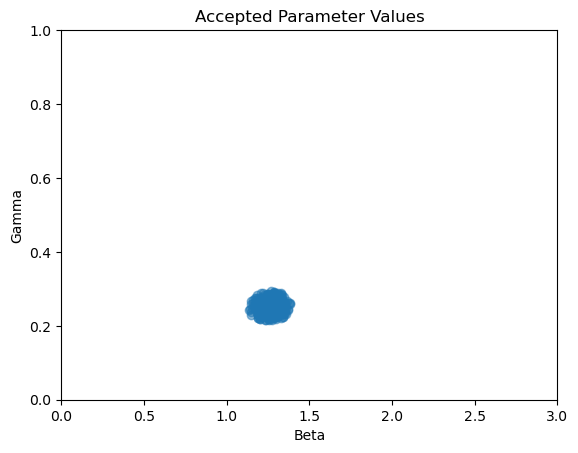

Posterior mean for beta = 1.2639
Posterior mean for gamma = 0.2540


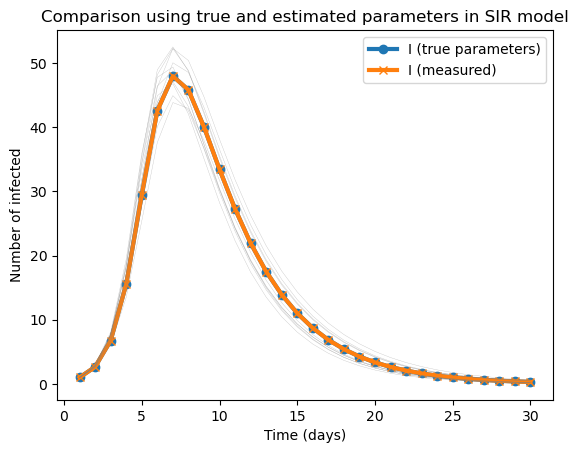

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.spatial.distance import norm

# Define the SIR model
def sir_model(y, t, beta, gamma, N):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

# Parameters
beta = 1.25
gamma = 0.25
N = 100
ndays = 30
t = np.arange(1, ndays + 1)

# Initial conditions: S = N-1, I = 1, R = 0
y0 = [N-1, 1, 0]

# Solve the SIR model
sol = odeint(sir_model, y0, t, args=(beta, gamma, N))

# Extract S, I, R
S, I, R = sol.T


# Generate observational noise
std = 0
xd = np.maximum(S + std * np.random.randn(len(t)), 0)
yd = np.maximum(I + std * np.random.randn(len(t)), 0)
zd = np.maximum(R + std * np.random.randn(len(t)), 0)
yexp = np.vstack((xd, yd, zd)).T

# ABC Rejection Algorithm
eps = 15
nmax = 200
nacc = 0
nsamp = 0
beta_acc = []
gamma_acc = []


while nacc < nmax:
    nsamp += 1
    beta = 3 * np.random.rand()
    gamma = np.random.rand()

    sol = odeint(sir_model, y0, t, args=(beta, gamma, N))
    _, I_sim, _ = sol.T

    err = norm(I_sim - yexp[:, 1])  # Compare only I values

    if err < eps:
        nacc += 1
        beta_acc.append(beta)
        gamma_acc.append(gamma)

# Compute acceptance rate
acc_rate = nmax / nsamp
print(f"Percentage acceptance rate = {100 * acc_rate:.2f}% when eps = {eps}")

# Scatter plot of accepted parameters
plt.figure()
plt.scatter(beta_acc, gamma_acc, alpha=0.5)
plt.xlabel('Beta')
plt.ylabel('Gamma')
plt.title('Accepted Parameter Values')
plt.xlim([0, 3])
plt.ylim([0, 1])
plt.show()

# Compute mean estimates for beta and gamma
bb = np.mean(beta_acc)
gg = np.mean(gamma_acc)
print(f"Posterior mean for beta = {bb:.4f}")
print(f"Posterior mean for gamma = {gg:.4f}")

# Solve the SIR model using estimated parameters
sol = odeint(sir_model, y0, t, args=(bb, gg, N))
_, I_est, _ = sol.T

# Compare true and estimated solutions
plt.figure()
plt.plot(t, I, 'o-', linewidth=3, label='I (true parameters)')
plt.plot(t, yd, 'x-', linewidth=3, label='I (measured)')
plt.xlabel('Time (days)')
plt.ylabel('Number of infected')
plt.title('Comparison using true and estimated parameters in SIR model')

# Plot additional posterior samples
nsamps = 10
for i in range(nsamps):
    sol = odeint(sir_model, y0, t, args=(beta_acc[i], gamma_acc[i], N))
    _, I_sample, _ = sol.T
    plt.plot(t, I_sample, linewidth=0.25, color='gray', alpha=0.5)

plt.legend()
plt.show()


Implementing the ABC rejection algorithm on the English boarding school data

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.spatial.distance import norm
from hpd import hpd_grid

def sir_model(y, t, beta, alphaa, N):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - alphaa * I
    dRdt = alphaa * I
    return [dSdt, dIdt, dRdt]

# Boarding School Data
days_obs = np.array([3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
infected_obs = np.array([25, 75, 227, 296, 258, 236, 192, 126, 71, 28, 11, 7])

# Parameters and initial conditions 
N = 763  # Total population
y0 = [N - infected_obs[0], infected_obs[0], 0]  
t_obs = days_obs  # Time points to evaluate

#ABC Rejection Algorithm parameters 
eps = 70        
nmax = 200        # Number of accepted samples desired
nacc = 0         #counter for accepted samples
nsamp = 0        #counter for total samples attempted or priors sampled
beta_accepted = []
alpha_accepted = []

#ABC Rejection Loop 

while nacc < nmax:  
    nsamp += 1
    beta = 3 * np.random.rand()     # Uniformly sample beta in [0, 3]
    alphaa = np.random.rand()        # Uniformly sample gamma in [0, 1]

    sol = odeint(sir_model, y0, t_obs, args=(beta, alphaa, N))

    _, I_sim, _ = sol.T    #transposed solution


    err = norm(I_sim - infected_obs)
    
    if err < eps:
        nacc += 1
        beta_accepted.append(beta)
        alpha_accepted.append(alphaa)

Percentage acceptance rate = 0.24% when eps = 70
82883


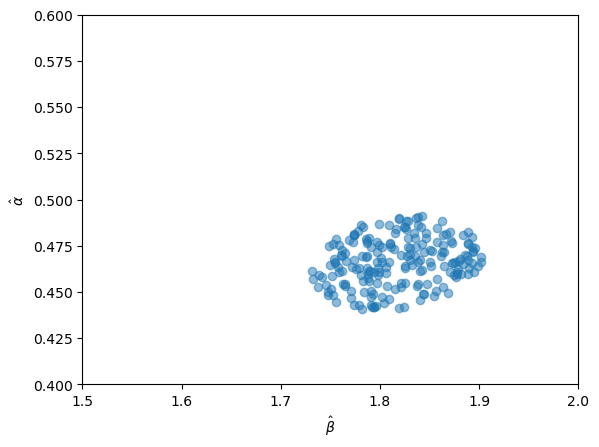

In [7]:
# Results Summary
acc_rate = nmax / nsamp
print(f"Percentage acceptance rate = {100 * acc_rate:.2f}% when eps = {eps}")

#Scatter plot of accepted parameters
plt.figure()
plt.scatter(beta_accepted, alpha_accepted, alpha=0.5)
plt.xlabel(r'$\hat{\beta}$')
plt.ylabel(r'$\hat{\alpha}$')
#plt.title('Accepted Parameter Values')
plt.xlim([01.5,2])
plt.ylim([0.4,0.6])
plt.grid(False)
# plt.show()

plt.savefig('accepted_parameter_values.pdf')

print(nsamp)

Posterior mean for beta = 1.8178
Posterior mean for alpha = 0.4663


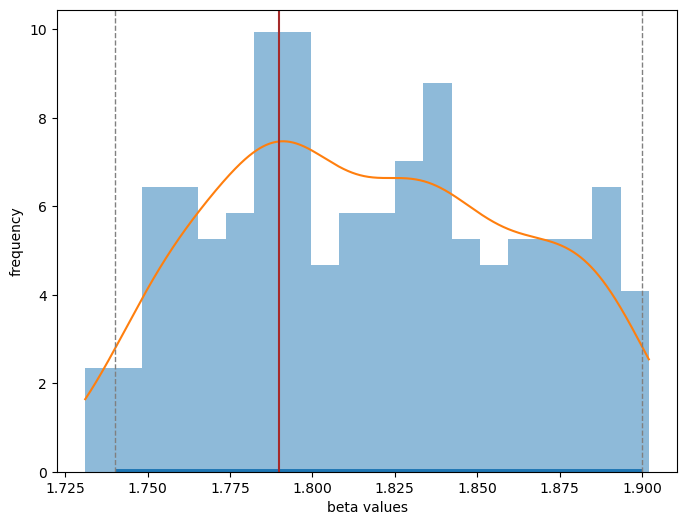

95% HPD Credible Interval(s) for beta:
  [1.7400, 1.9000]


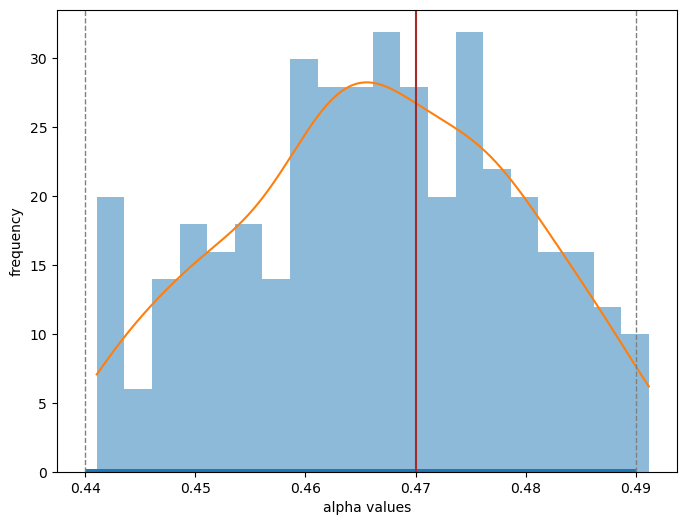

95% HPD Credible Interval(s) for alphaa:
  [0.4400, 0.4900]


In [8]:
#Posterior mean estimates
bb = np.mean(beta_accepted)
gg = np.mean(alpha_accepted)
print(f"Posterior mean for beta = {bb:.4f}")
print(f"Posterior mean for alpha = {gg:.4f}")

hpd_beta, x_beta, y_beta, modes_beta = hpd_grid(beta_accepted)

plt.figure(figsize=(8,6))

# raw data
plt.hist(beta_accepted, density=True, bins=20, alpha=0.5)

# estimated distribution
plt.plot(x_beta, y_beta)
plt.xlabel(r'beta values')
plt.ylabel(r'frequency')
# high density intervals
for (x0, x1) in hpd_beta:
    plt.hlines(y=0, xmin=x0, xmax=x1, linewidth=5)
    plt.axvline(x=x0, color='grey', linestyle='--', linewidth=1)
    plt.axvline(x=x1, color='grey', linestyle='--', linewidth=1)

# modes
for xm in modes_beta:
    plt.axvline(x=xm, color='brown')

plt.show()


#Solve SIR using estimated mean parameters
sol_est = odeint(sir_model, y0, t_obs, args=(bb, gg, N))
_, I_est, _ = sol_est.T


# Assuming hpd_beta contains one or more (start, end) tuples
print("95% HPD Credible Interval(s) for beta:")
for (x0, x1) in hpd_beta:
    print(f"  [{x0:.4f}, {x1:.4f}]")
    
###########################################

hpd_alphaa, x_alphaa, y_alphaa, modes_alphaa = hpd_grid(alpha_accepted)

plt.figure(figsize=(8,6))

# raw data
plt.hist(alpha_accepted, density=True, bins=20, alpha=0.5)

# estimated distribution
plt.plot(x_alphaa, y_alphaa)
plt.xlabel(r'alpha values')
plt.ylabel(r'frequency')
# high density intervals
for (x0, x1) in hpd_alphaa:
    plt.hlines(y=0, xmin=x0, xmax=x1, linewidth=5)
    plt.axvline(x=x0, color='grey', linestyle='--', linewidth=1)
    plt.axvline(x=x1, color='grey', linestyle='--', linewidth=1)

# modes
for xm in modes_alphaa:
    plt.axvline(x=xm, color='brown')

plt.show()


#Solve SIR using estimated mean parameters
sol_est = odeint(sir_model, y0, t_obs, args=(bb, gg, N))
_, I_est, _ = sol_est.T


# Assuming hpd_beta contains one or more (start, end) tuples
print("95% HPD Credible Interval(s) for alphaa:")
for (x0, x1) in hpd_alphaa:
    print(f"  [{x0:.4f}, {x1:.4f}]")



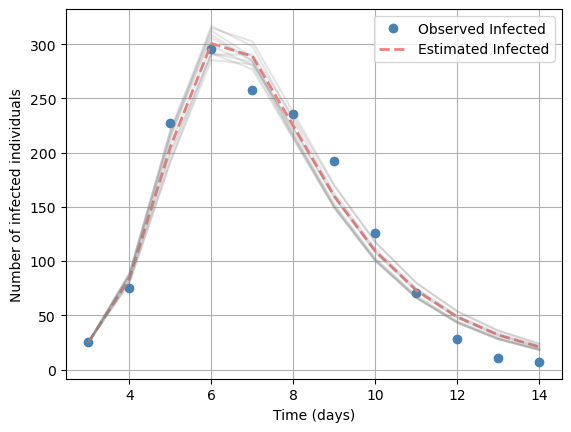

In [9]:
#Plot true vs. estimated
plt.figure()
plt.plot(t_obs, infected_obs, 'o', label='Observed Infected',color ='steelblue')
plt.plot(t_obs, I_est, '--', linewidth=2, label='Estimated Infected', color='lightcoral')

#overlay some accepted samples
for i in range(10):
    sol_sample = odeint(sir_model, y0, t_obs, args=(beta_accepted[i], alpha_accepted[i], N))
    _, I_sample, _ = sol_sample.T
    plt.plot(t_obs, I_sample, color='gray', alpha=0.2)

plt.xlabel('Time (days)')
plt.ylabel('Number of infected individuals')
#plt.title('ABC Fit of SIR Model to Observed Data')
plt.legend()
plt.grid(True)
plt.show()


In [10]:
import pandas as pd
Covid_19_data = pd.read_csv("ZAF.csv")


In [11]:
covid_data = Covid_19_data.fillna(value=0)
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
covid_data.head()


,id,date,confirmed,deaths,recovered,tests,vaccines,people_vaccinated,people_fully_vaccinated,hosp,icu,vent,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,facial_coverings,vaccination_policy,elderly_people_protection,government_response_index,stringency_index,containment_health_index,economic_support_index,administrative_area_level,administrative_area_level_1,administrative_area_level_2,administrative_area_level_3,latitude,longitude,population,iso_alpha_3,iso_alpha_2,iso_numeric,iso_currency,key_local,key_google_mobility,key_apple_mobility,key_jhu_csse,key_nuts,key_gadm
0,b46d9ea6,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,South Africa,0,0.0,-30.5595,22.9375,57779622,ZAF,ZA,710,ZAR,0,ChIJURLu2YmmNBwRoOikHwxjXeg,South Africa,ZA,0.0,ZAF
1,b46d9ea6,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,South Africa,0,0.0,-30.5595,22.9375,57779622,ZAF,ZA,710,ZAR,0,ChIJURLu2YmmNBwRoOikHwxjXeg,South Africa,ZA,0.0,ZAF
2,b46d9ea6,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,South Africa,0,0.0,-30.5595,22.9375,57779622,ZAF,ZA,710,ZAR,0,ChIJURLu2YmmNBwRoOikHwxjXeg,South Africa,ZA,0.0,ZAF
3,b46d9ea6,2020-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,South Africa,0,0.0,-30.5595,22.9375,57779622,ZAF,ZA,710,ZAR,0,ChIJURLu2YmmNBwRoOikHwxjXeg,South Africa,ZA,0.0,ZAF
4,b46d9ea6,2020-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,South Africa,0,0.0,-30.5595,22.9375,57779622,ZAF,ZA,710,ZAR,0,ChIJURLu2YmmNBwRoOikHwxjXeg,South Africa,ZA,0.0,ZAF


In [12]:
# Convert string columns to numeric
covid_data["confirmed"] = pd.to_numeric(covid_data["confirmed"], errors="coerce")
covid_data["deaths"] = pd.to_numeric(covid_data["deaths"], errors="coerce")
covid_data["recovered"] = pd.to_numeric(covid_data["recovered"], errors="coerce")


In [13]:
real_world_data = covid_data.iloc[84:149,1:5]
real_world_data = real_world_data.reset_index(drop=True)
real_world_data.tail()

,date,confirmed,deaths,recovered
60,2020-05-26,24264.0,524.0,12741.0
61,2020-05-27,25937.0,552.0,13451.0
62,2020-05-28,27403.0,577.0,14370.0
63,2020-05-29,29240.0,611.0,15093.0
64,2020-05-30,30967.0,643.0,16116.0


In [14]:
num_confirmed = real_world_data["confirmed"]
num_deaths = real_world_data["deaths"]
num_recovered = real_world_data["recovered"]
# days_obs = real_world_data.iloc[:, 0]
days_obs = real_world_data['date']



In [15]:
days_obs1 = np.array(range(len(days_obs)))

In [16]:
num_confirmed = np.array(real_world_data["confirmed"].astype(int).values)
num_deaths = np.array(real_world_data["deaths"].astype(int).values)
num_recovered = np.array(real_world_data["recovered"].astype(int).values)
print(norm(num_confirmed))
print(num_confirmed[:5], num_confirmed.dtype)


95565.71390933047
[1170 1187 1280 1326 1353] int64


Implementing ABC rejection algorithm on the covid data

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.spatial.distance import norm

def sird_model(y, t, kappa, sigma, delta):
    S, I, R, D = y
#     N = S + I + R + D  # total population
    dSdt = -kappa * S * I / N
    dIdt = kappa * S * I / N - sigma * I - delta * I
    dRdt = sigma * I
    dDdt = delta * I
    return [dSdt, dIdt, dRdt, dDdt]


In [18]:

# Parameters and initial conditions 
N = 57779622  # Total population
y0 = [N-num_confirmed[0],
      num_confirmed[0]-num_recovered[0]-num_deaths[0],
      num_recovered[0],
      num_deaths[0]
     ]

# t_obs = days_obs  # Time points to evaluate
t_obs = days_obs1

#ABC Rejection Algorithm parameters 
eps = 500000        
nmax = 1000        # Number of accepted samples desired
npilot=1000     # Number of pilot runs to determine eps for rejection sampling
nacc = 0         #counter for accepted samples
nsamp = 0        #counter for total samples attempted or priors sampled
kappa_accepted = []
sigma_accepted = []
delta_accepted= []
dist= []

In [19]:
y0

[57778452, 1169, 0, 1]

In [20]:

for i in range(npilot):
    kappa= np.random.rand()
    sigma = 0.2*np.random.rand()
    delta = 0.01*np.random.rand()

    if kappa-sigma-delta > 0:
       sol=odeint(sird_model,y0,t_obs,args=(kappa,sigma,delta))
       S_sim, I_sim, R_sim, D_sim = sol.T 
       dist.append(norm(I_sim-(num_confirmed-num_recovered-num_deaths))+norm(R_sim-num_recovered)+norm(D_sim-num_deaths))

eps=np.percentile(dist,0.1)  # set eps as 1 percentile of distances
print(eps)
   



while nacc < nmax:  
    nsamp += 1
    kappa =  np.random.rand()     # Uniformly sample kappa, sigma, delta in [0, 1]
    sigma = 0.2*np.random.rand()        
    delta = 0.01*np.random.rand()

    if kappa-sigma-delta > 0:
    
#     sol = odeint(sird_model, y0, t_obs, args=(kappa,sigma,delta, N))
       sol = odeint(sird_model, y0, t_obs, args=(kappa,sigma,delta))

       S_sim, I_sim,R_sim,D_sim = sol.T    #transposed solution

       err= norm(I_sim - (num_confirmed - num_recovered - num_deaths))+norm(R_sim-num_recovered)+norm(D_sim-num_deaths)
    
       if err < eps:
          nacc += 1
          print(nacc)
          kappa_accepted.append(kappa)
          sigma_accepted.append(sigma)
          delta_accepted.append(delta)
        


36979.52671525745
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
27

In [21]:
# Results Summary
acc_rate = nmax / nsamp
print(f"Percentage acceptance rate = {100 * acc_rate:.2f}% when eps = {eps}")


Percentage acceptance rate = 0.17% when eps = 36979.52671525745


In [22]:
kk = np.mean(kappa_accepted)
ss = np.mean(sigma_accepted)
dd = np.mean(delta_accepted)

print(f"Posterior mean for kappa = {kk:.4f}")
print(f"Posterior mean for sigma = {ss:.4f}")
print(f"Posterior mean for delta = {dd:.4f}")


Posterior mean for kappa = 0.0818
Posterior mean for sigma = 0.0401
Posterior mean for delta = 0.0041


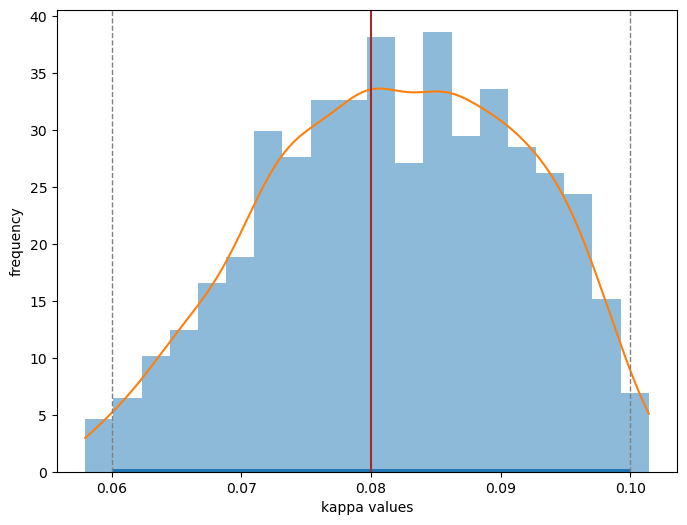

95% HPD Credible Interval(s) for kappa:
  [0.0600, 0.1000]


In [23]:
from hpd import hpd_grid
hpd_kappa, x_kappa, y_kappa, modes_kappa = hpd_grid(kappa_accepted)
plt.figure(figsize=(8,6))
# raw data
plt.hist(kappa_accepted, density=True, bins=20, alpha=0.5)
# estimated distribution
plt.plot(x_kappa, y_kappa)
plt.xlabel(r'kappa values')
plt.ylabel(r'frequency')
# high density intervals
for (x0, x1) in hpd_kappa:
    plt.hlines(y=0, xmin=x0, xmax=x1, linewidth=5)
    plt.axvline(x=x0, color='grey', linestyle='--', linewidth=1)
    plt.axvline(x=x1, color='grey', linestyle='--', linewidth=1)
# modes
for xm in modes_kappa:
    plt.axvline(x=xm, color='brown')
    
plt.show()

print("95% HPD Credible Interval(s) for kappa:")
for (x0, x1) in hpd_kappa:
    print(f"  [{x0:.4f}, {x1:.4f}]")
    


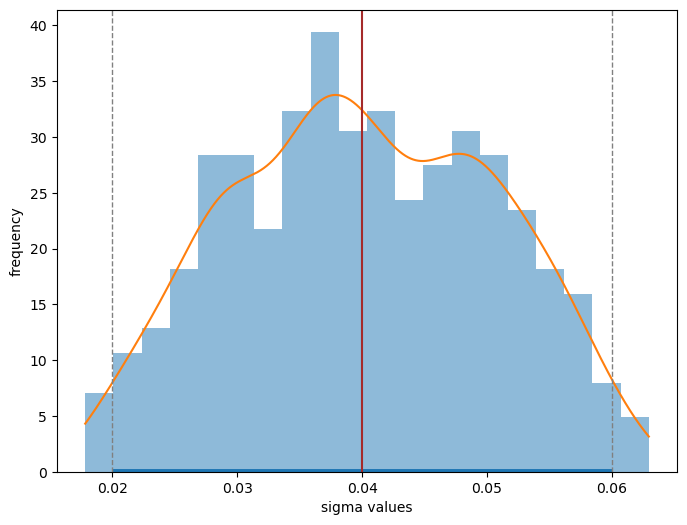

95% HPD Credible Interval(s) for sigma:
  [0.0200, 0.0600]


In [24]:
hpd_sigma, x_sigma, y_sigma, modes_sigma = hpd_grid(sigma_accepted)
plt.figure(figsize=(8,6))

# raw data
plt.hist(sigma_accepted, density=True, bins=20, alpha=0.5)

# estimated distribution
plt.plot(x_sigma, y_sigma)
plt.xlabel(r'sigma values')
plt.ylabel(r'frequency')
# high density intervals
for (x0, x1) in hpd_sigma:
    plt.hlines(y=0, xmin=x0, xmax=x1, linewidth=5)
    plt.axvline(x=x0, color='grey', linestyle='--', linewidth=1)
    plt.axvline(x=x1, color='grey', linestyle='--', linewidth=1)

# modes
for xm in modes_sigma:
    plt.axvline(x=xm, color='brown')

plt.show()

print("95% HPD Credible Interval(s) for sigma:")
for (x0, x1) in hpd_sigma:
    print(f"  [{x0:.4f}, {x1:.4f}]")


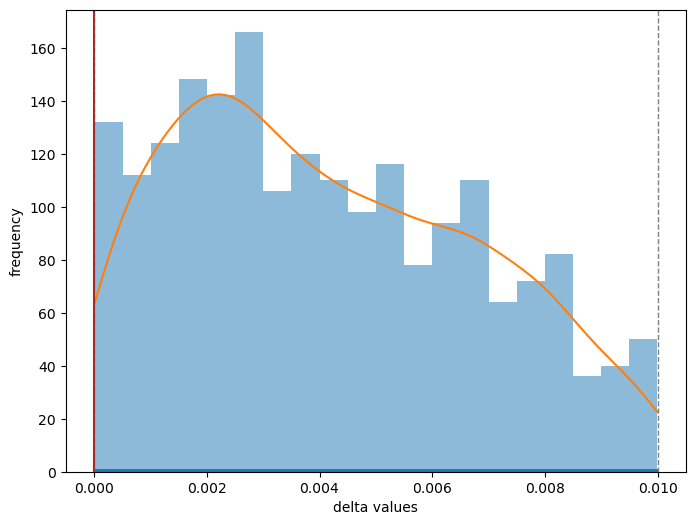

95% HPD Credible Interval(s) for delta:
  [0.0000, 0.0100]


In [25]:
hpd_delta, x_delta, y_delta, modes_delta = hpd_grid(delta_accepted)
plt.figure(figsize=(8,6))

# raw data
plt.hist(delta_accepted, density=True, bins=20, alpha=0.5)

# estimated distribution
plt.plot(x_delta, y_delta)
plt.xlabel(r'delta values')
plt.ylabel(r'frequency')
# high density intervals
for (x0, x1) in hpd_delta:
    plt.hlines(y=0, xmin=x0, xmax=x1, linewidth=5)
    plt.axvline(x=x0, color='grey', linestyle='--', linewidth=1)
    plt.axvline(x=x1, color='grey', linestyle='--', linewidth=1)

# modes
for xm in modes_delta:
    plt.axvline(x=xm, color='brown')

plt.show()

print("95% HPD Credible Interval(s) for delta:")
for (x0, x1) in hpd_delta:
    print(f"  [{x0:.4f}, {x1:.4f}]")


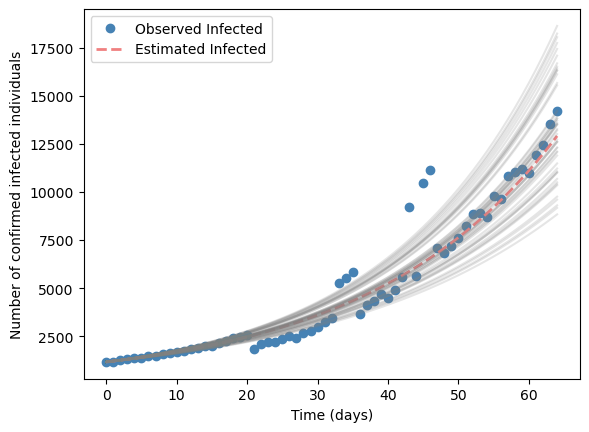

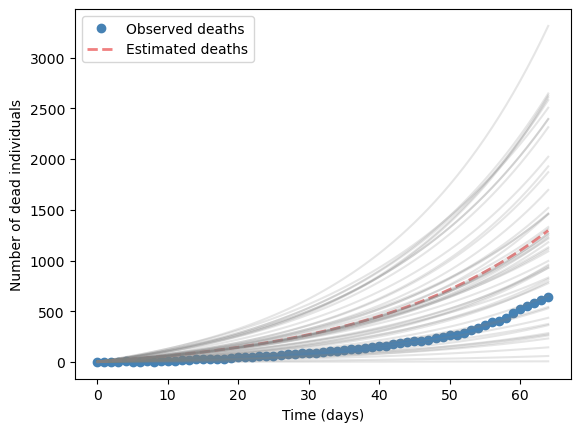

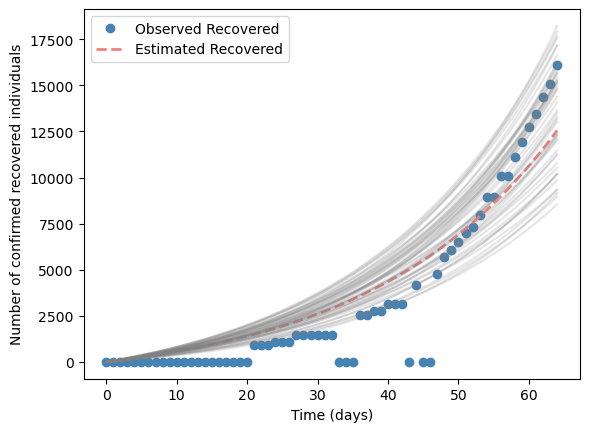

In [26]:
#Solve SIRD using estimated mean parameters
sol_est2 = odeint(sird_model, y0, t_obs, args=(kk, ss, dd))
S_est, I_est, R_est, D_est = sol_est2.T

#Plot true vs. estimated confirmed infections
plt.figure()
plt.plot(t_obs, num_confirmed-num_deaths-num_recovered, 'o', label='Observed Infected',color ='steelblue')
plt.plot(t_obs, I_est, '--', linewidth=2, label='Estimated Infected', color='lightcoral')
for i in range(50):
    sol_sample = odeint(sird_model, y0, t_obs, args=(kappa_accepted[i], sigma_accepted[i],delta_accepted[i]))
    _, I_sample,_ , _ = sol_sample.T
    plt.plot(t_obs, I_sample, color='gray', alpha=0.2)
plt.xlabel('Time (days)')
plt.ylabel('Number of confirmed infected individuals')
plt.legend()
plt.show()


#Plot true vs. estimated deaths
plt.figure()
plt.plot(t_obs, num_deaths, 'o', label='Observed deaths',color ='steelblue')
plt.plot(t_obs, D_est, '--', linewidth=2, label='Estimated deaths', color='lightcoral')

for i in range(50):
    sol_sample = odeint(sird_model, y0, t_obs, args=(kappa_accepted[i], sigma_accepted[i],delta_accepted[i]))
    _, _,_ , D_sample= sol_sample.T
    plt.plot(t_obs, D_sample, color='gray', alpha=0.2)

plt.xlabel('Time (days)')
plt.ylabel('Number of dead individuals')
plt.legend()
plt.show()



#Plot true vs. estimated recovered
plt.figure()
plt.plot(t_obs, num_recovered, 'o', label='Observed Recovered',color ='steelblue')
plt.plot(t_obs, R_est, '--', linewidth=2, label='Estimated Recovered', color='lightcoral')
for i in range(50):
    sol_sample = odeint(sird_model, y0, t_obs, args=(kappa_accepted[i], sigma_accepted[i],delta_accepted[i]))
    _, _,R_sample , _ = sol_sample.T
    plt.plot(t_obs, R_sample, color='gray', alpha=0.2)
plt.xlabel('Time (days)')
plt.ylabel('Number of confirmed recovered individuals')
plt.legend()
plt.show()


576992


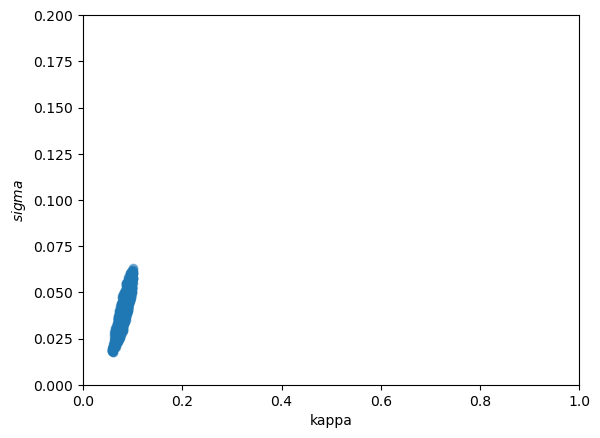

In [27]:


#Scatter plot of accepted parameters
plt.figure()
plt.scatter(kappa_accepted, sigma_accepted, alpha=0.5)
plt.xlabel(r'kappa')
plt.ylabel(r'$sigma$')
#plt.title('Accepted Parameter Values')
plt.xlim([0,1])
plt.ylim([0.0,0.2])
plt.grid(False)
# plt.show()

plt.savefig('accepted_parameter_values.pdf')

print(nsamp)

576992


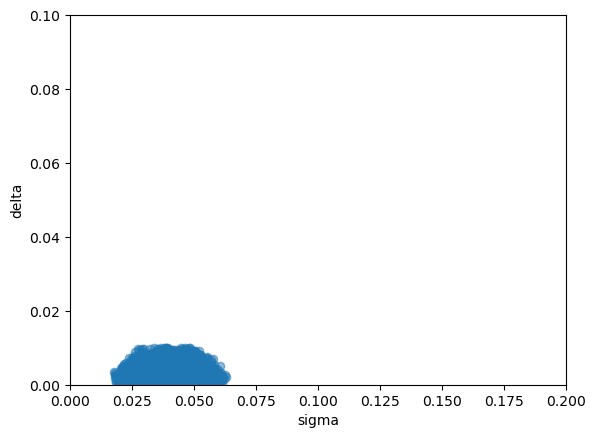

In [28]:


#Scatter plot of accepted parameters
plt.figure()
plt.scatter(sigma_accepted, delta_accepted, alpha=0.5)
plt.xlabel(r'sigma')
plt.ylabel(r'delta')
#plt.title('Accepted Parameter Values')
plt.xlim([0,0.2])
plt.ylim([0.0,0.1])
plt.grid(False)
# plt.show()

plt.savefig('accepted_parameter_values.pdf')

print(nsamp)